# GLM 해보기(추정)

GLM or 일반 선형 모델(ANOVA, t-test,f-test) 및 가장 중요한 일반 선형 회귀와 같이 익숙할 다양한 통계 모델의 기초가 되는 통계 모델.

fMRI 분석 유형은 시계열 데이터에 적용되는 선형 회귀 모델.

우선 시각화 해보자.

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
import nibabel as nb
import pandas as pd

In [9]:
# x:19. y:16, z:17 축의 시계열 데이터.
img = nb.load('D:/fmri/3. derivatives 폴더에 넣어야 하는 것 (전처리 후 데이터, MNI 템플릿)/fmriprep/sub-ID2207071/func/sub-ID2207071_task-r1_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz')
voxel_signal = img.get_fdata()[19,16,17, :]

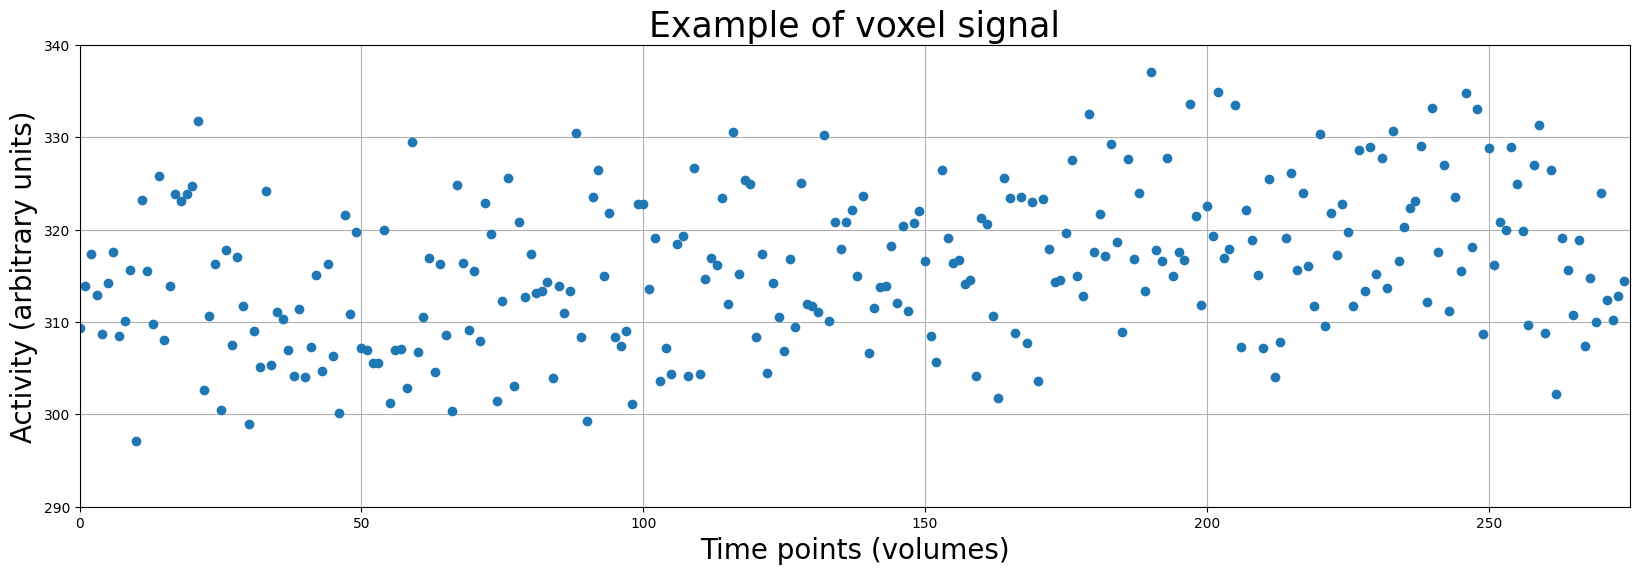

In [16]:
# 시각화
plt.figure(figsize=(20, 6))
plt.plot(voxel_signal, 'o')
plt.xlabel('Time points (volumes)', fontsize=20)
plt.ylabel('Activity (arbitrary units)', fontsize=20)

x_lim, y_lim = (0, 275), (290, 340)
plt.xlim(x_lim)
plt.ylim(y_lim)

plt.title('Example of voxel signal', fontsize=25)
plt.grid()
plt.show()

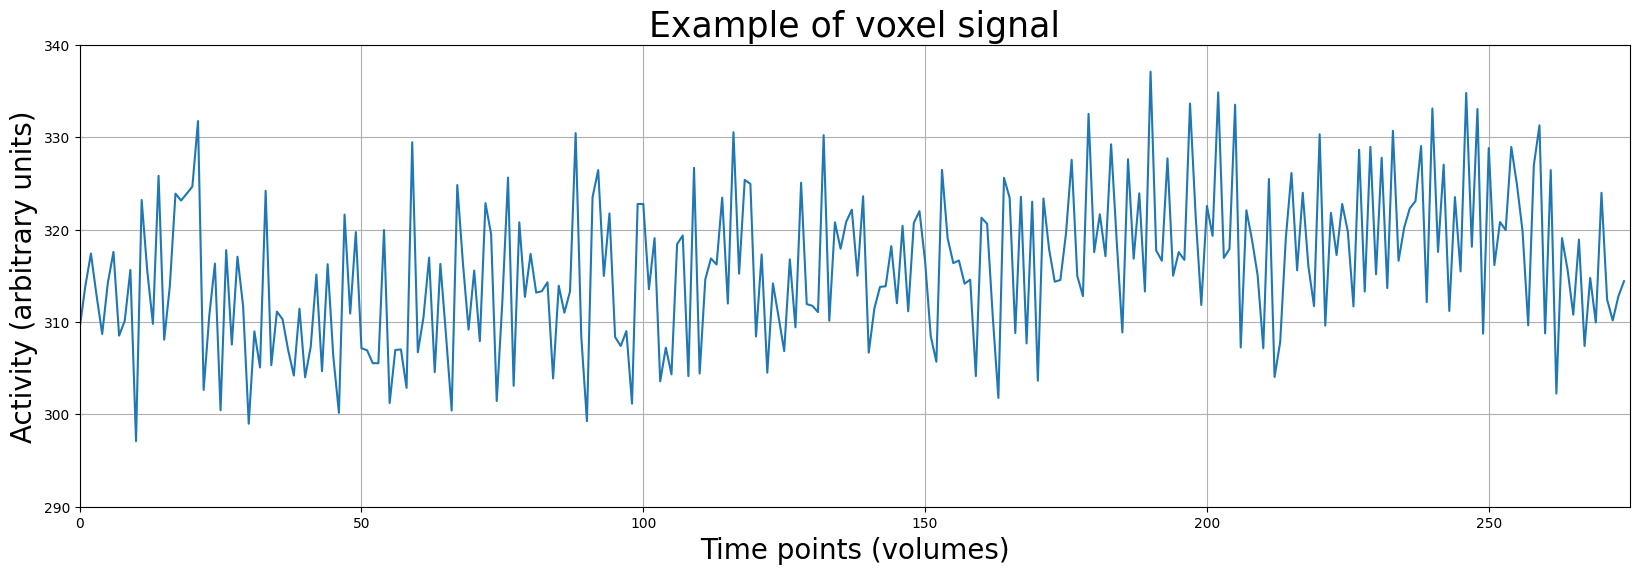

In [17]:
# 연속선상으로.
plt.figure(figsize=(20, 6))
plt.plot(voxel_signal)
plt.xlabel('Time points (volumes)', fontsize=20)
plt.ylabel('Activity (arbitrary units)', fontsize=20)
plt.title('Example of voxel signal', fontsize=25)
x_lim, y_lim = (0, 275), (290, 340)
plt.xlim(x_lim)
plt.ylim(y_lim)
plt.grid()
plt.show()

## 독립변수 정의

왼손, 오른손을 초 단위로 써보자.


In [24]:
onsets_left  = np.array([18, 38, 46, 56, 64, 82, 120, 158, 192, 240, 258, 294, 318, 326, 346, 364, 384, 394, 412, 428, 444, 466, 474, 498, 508, 534], dtype=int)
onsets_right = np.array([10, 30, 74, 90, 104, 112, 130, 138, 148, 166, 176, 184, 202, 210, 218, 226, 250, 266, 278, 286, 302, 310, 338, 356, 376, 402, 420, 436, 458, 482, 490, 516, 524, 542], dtype=int)

In [25]:
onsets_all = np.concatenate((onsets_left, onsets_right))
print(onsets_all)

[ 18  38  46  56  64  82 120 158 192 240 258 294 318 326 346 364 384 394
 412 428 444 466 474 498 508 534  10  30  74  90 104 112 130 138 148 166
 176 184 202 210 218 226 250 266 278 286 302 310 338 356 376 402 420 436
 458 482 490 516 524 542]


이제 이 벡터를 적절한 예측 변수로 변환. 현재 변수에는 시작점만 포함되어 있지만, 예측 변수는 x와 동일한 모양을 가진 배열이여야함.
예측 변수가 신호가 자극의 존재에 반응한다는 가설을 나타내야한다는 점을 고려하면, 시작점에 해당하는 인덱스를 제외하고 보두 0인 벡터로 예측 변수를 구성할 수 있다. 자극 값은 1.

In [26]:
predictor_all = np.zeros(550)
predictor_all[onsets_all] = 1

print(predictor_all.T)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.

## Resampling

근데, 복셀 그래프 보면 자극 예측기에 문제가 있음. 신호와 다른 시간 척도임(복셀은 275초.. 실제 데이터는 550초.)
왜냐하면 복셀 신호를 TR 2초 간격으로 찍었고, 자극은 1초 단위이기 때문.

그래서 2초마다 하나의 데이터 포인트로 다운 샘플링하여 해결할 수 있다.
아래 그래프에서는 다운샘플링 후 예측 변수를 구성하는 데이터 포인트가 빨간색 점선.
파란색은 원래 시간에서의 자극

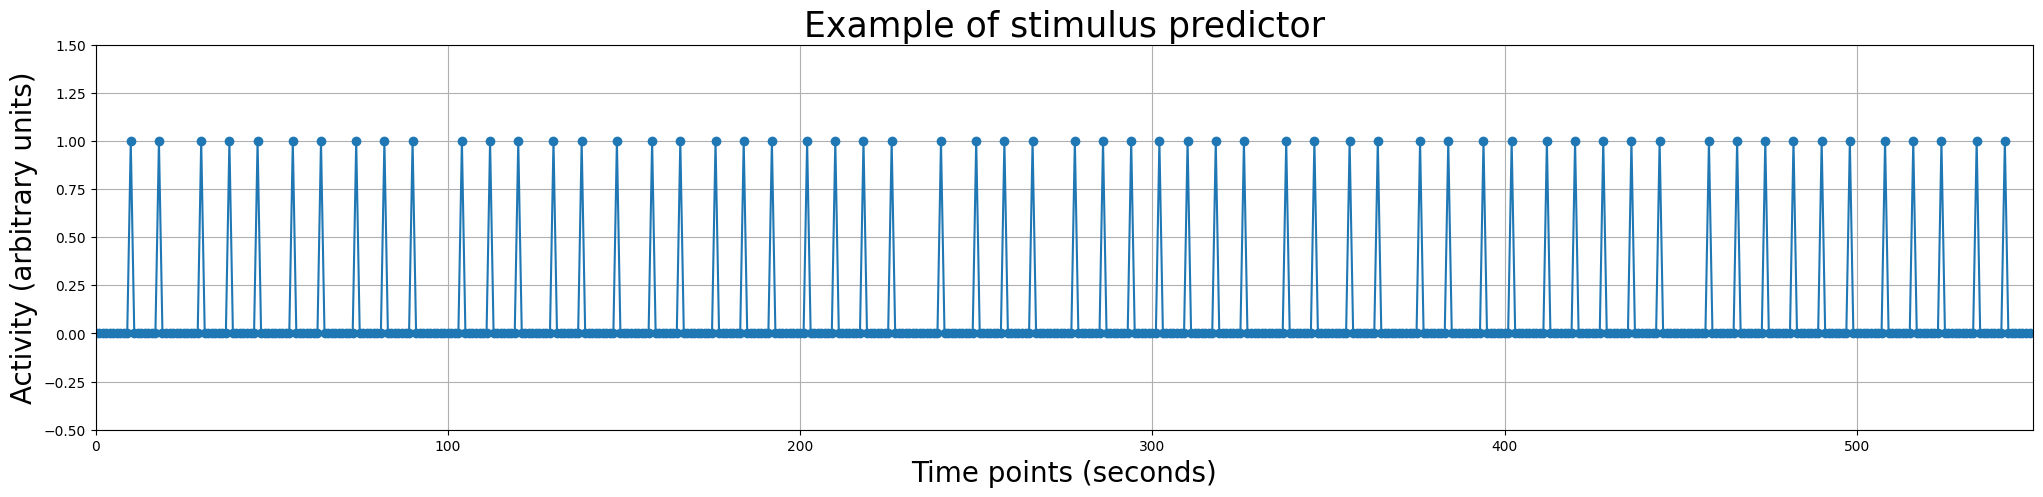

In [27]:
plt.figure(figsize=(25, 5))
plt.plot(predictor_all, marker='o')
plt.xlabel('Time points (seconds)', fontsize=20)
plt.ylabel('Activity (arbitrary units)', fontsize=20)
plt.xlim(0, 550)
plt.ylim(-.5, 1.5)
plt.title('Example of stimulus predictor', fontsize=25)
plt.grid()
plt.show()

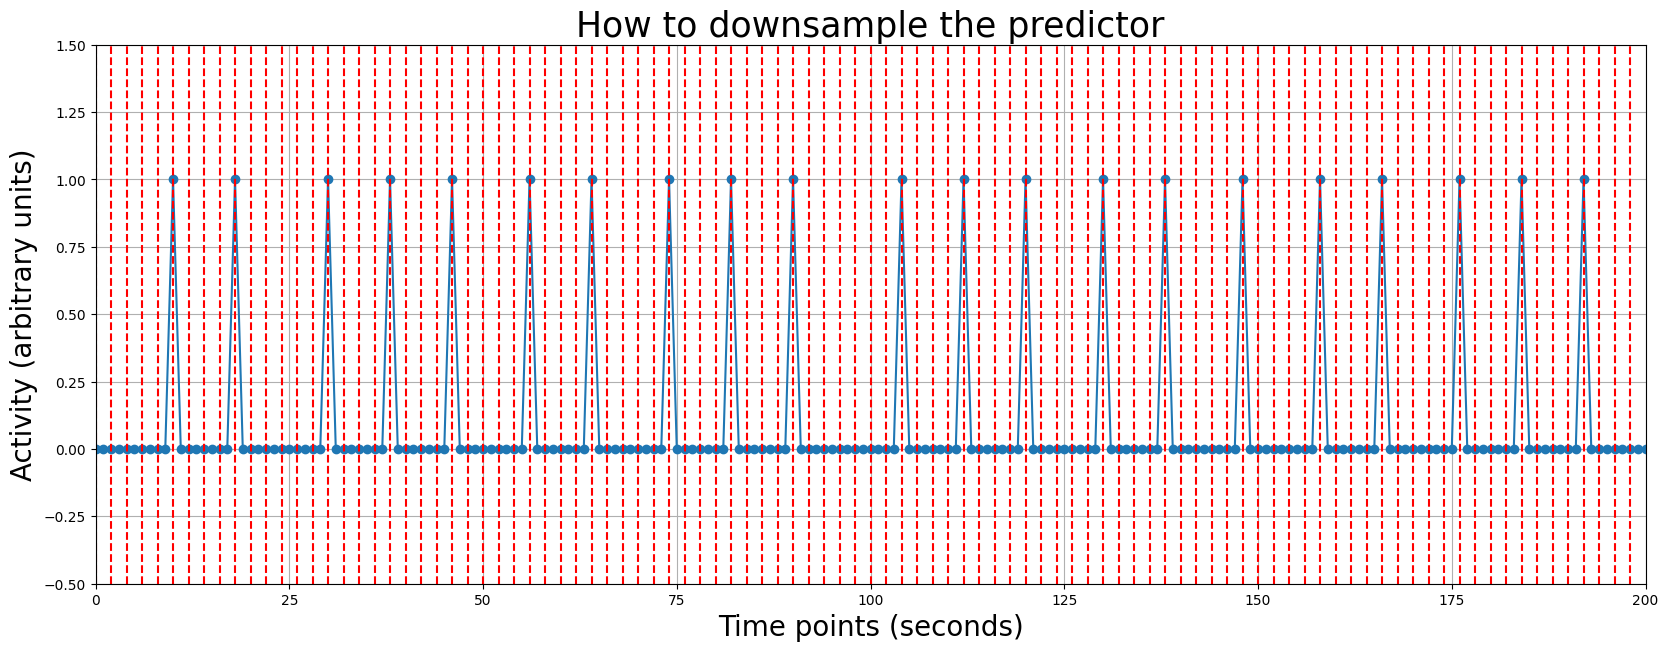

In [30]:
# 잘보기위해 100초만 표기

plt.figure(figsize=(20, 7))
plt.plot(predictor_all, marker='o')
plt.xlabel('Time points (seconds)', fontsize=20)
plt.ylabel('Activity (arbitrary units)', fontsize=20)
plt.xlim(0, 200)
plt.ylim(-.5, 1.5)
plt.title('How to downsample the predictor', fontsize=25)
plt.grid()

for t in np.arange(0, 200, 2):
    plt.axvline(t, ls='--', c='r')

plt.show()

먼저 원본 배열의 규모와 원본 배열의 값 사이의 매핑을 만든 다음 원본 배열을 다른 규모로 변환하는 방식으로 작동.

In [32]:
# resampler = interp1d(original_scale, original_array, kind='linear')
# downsampled_array = resampler(desired_scale)

from scipy.interpolate import interp1d

original_scale = np.arange(0, 550, 1) # 0~550 초
print("원래 scale : ", original_scale.size)
resampler = interp1d(original_scale, predictor_all)

desired_scale = np.arange(0, 550, 2)
print('Desired scale has %i datapoints(0, 2, 4, ... 550, in volumes)'%desired_scale.size)
predictor_all_ds = resampler(desired_scale)

print("Downsampled predictor has %i datapoints (in volumes)" % predictor_all_ds.size)

원래 scale :  550
Desired scale has 275 datapoints(0, 2, 4, ... 550, in volumes)
Downsampled predictor has 275 datapoints (in volumes)


In [33]:
# 직접 보자.
print(predictor_all_ds)

[0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.
 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.
 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0.
 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0.
 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0.
 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.]


In [193]:
print(predictor_all_ds.shape, voxel_signal.shape)

(275,) (275,)


이제 예측 변수(X), 대상(y) 모양이 동일해졌다. 선현회귀 적용가능 한번 플로팅 해보자.

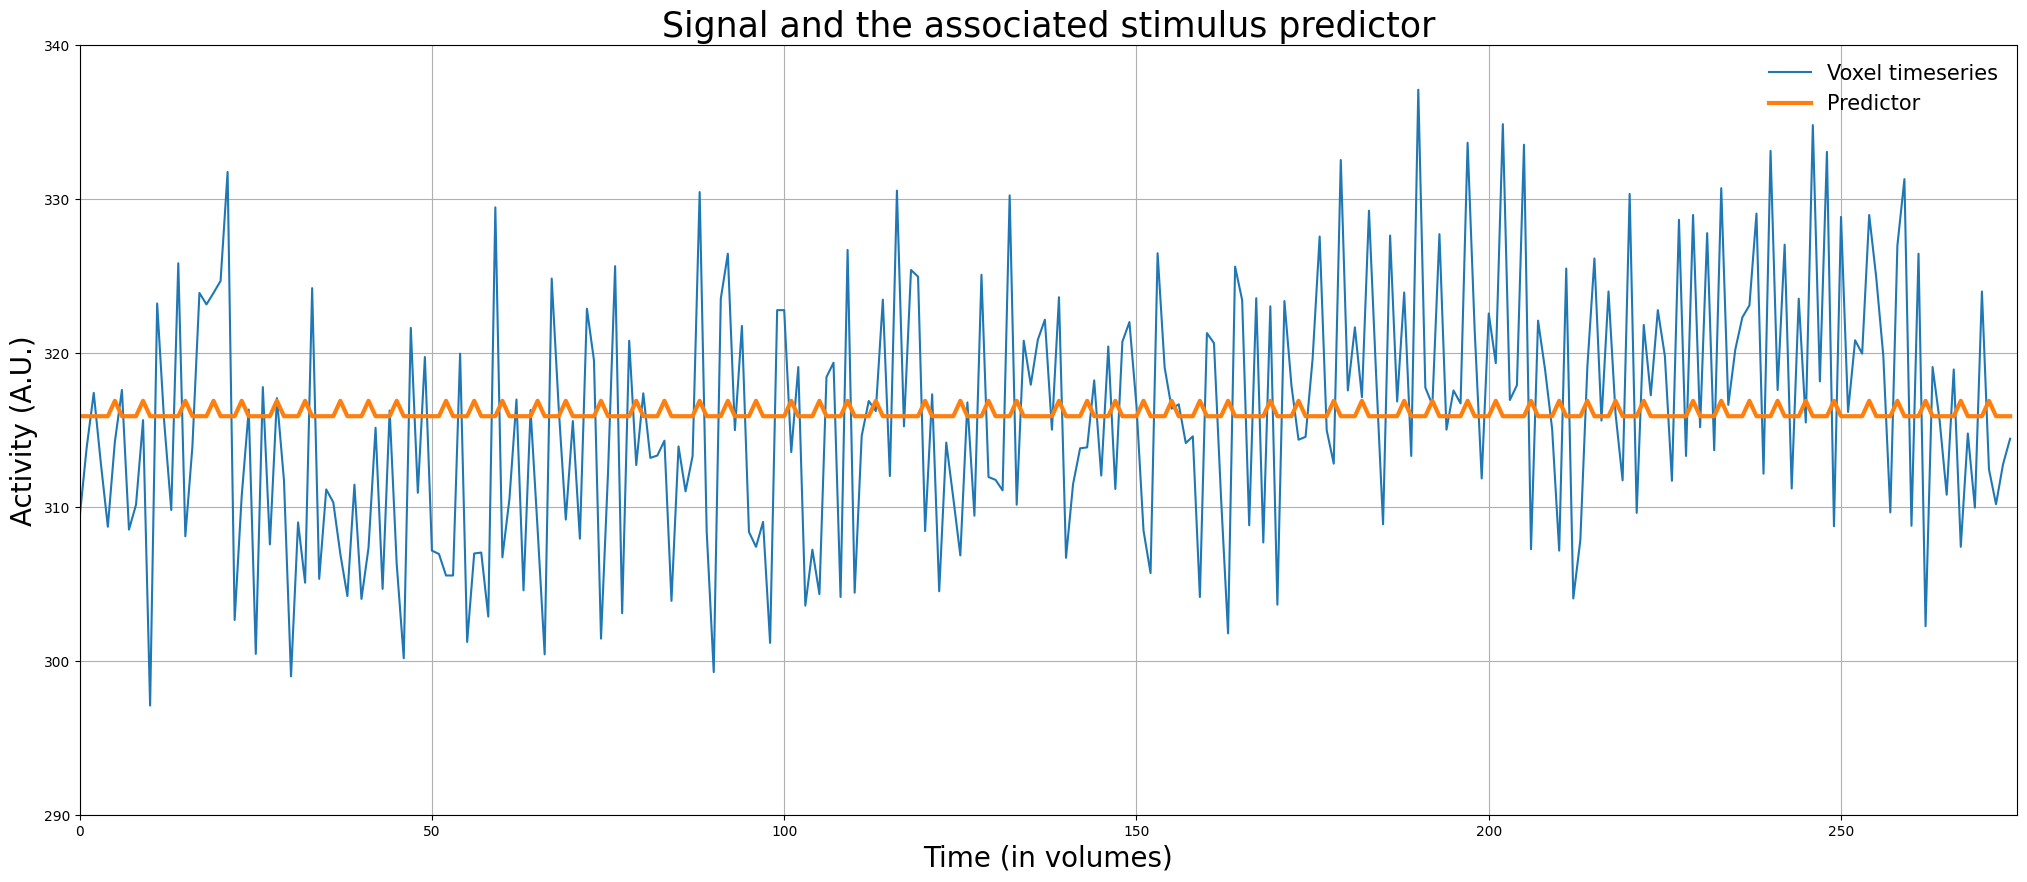

In [34]:
plt.figure(figsize=(25, 10))
plt.plot(voxel_signal)
plt.plot(predictor_all_ds + voxel_signal.mean(), lw=3)
plt.xlim(x_lim)
plt.ylim(y_lim)
plt.xlabel('Time (in volumes)', fontsize=20)
plt.ylabel('Activity (A.U.)', fontsize=20)
plt.legend(['Voxel timeseries', 'Predictor'], fontsize=15, loc='upper right', frameon=False)
plt.title("Signal and the associated stimulus predictor", fontsize=25)
plt.grid()
plt.show()

## fMRI 데이터 및 해석 매개변수에 대한 회귀

fMRI 데이터에 회귀 분석 적용하는 것은 일반 비시계열 데이터와 거의 동일하게 수행됨.

In [195]:
predictor_all_ds = predictor_all_ds.reshape(-1,1)
predictor_all_ds

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],

In [196]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(predictor_all_ds, voxel_signal)

LinearRegression()

In [197]:
print('intercept : ', regressor.intercept_, 'coef : ', regressor.coef_)

intercept :  316.324095447812 coef :  [-2.04515823]


In [199]:
n_obs = 275
intercept = np.ones((n_obs, 1))

tuple_with_arrays = (intercept, predictor_all_ds)
X_with_icept = np.hstack(tuple_with_arrays)

y = voxel_signal
# Note: you could also simply do ...
# X_with_icept = np.hstack((np.ones((y.size, 1)), X))
# ... but arguably this is less 'readable' than the implementation above
print("Shape of X is now: %s" % (X_with_icept.shape,))

from numpy.linalg import inv

est_betas = inv(X_with_icept.T @ X_with_icept) @ X_with_icept.T @ y

print("Shape of estimated betas: %s" % (est_betas.shape,))
print(est_betas)

Shape of X is now: (275, 2)
Shape of estimated betas: (2,)
[316.32409545  -2.04515823]


In [209]:
# MSE
y_pred = regressor.predict(predictor_all_ds)

from sklearn.metrics import mean_squared_error
mean_squared_error(voxel_signal, y_pred)

66.20829700024669

데이터도 안좋고, 회귀를 갖다 박았으니 coef가 마이너스가 나온다....

# GLM 모델에서..

우리는 우선 자극에 대한 반응으로 활동을 모델링하기 위해 predictor가 자극이 시작되는 순간 활동의 증가/감소를 포착해야한다고 가정했다. Bold 반응은 상당히 느려서.. fMRI를 사용하여 자극이나 작업에 반응하는 신경 활동의 즉각적인 변화를 측정하는 것은 불가능 하다.(보통 5-7초 후)

즉, 위 모델에서 우리는 지연시간을 BOLD response와 통합하지 않았음. 단순히 event에 대한 즉각적 반응으로 모델링 했을 뿐.

# 표준 HRF

fMRI 데이터의 다변량 분석에서 BOLD 반응에 대한 지식을 통합하는 가장 쉽고 가장 자주 사용되는 접근 방식은 각 복셀이 고정된 방식으로 자극에 반응한다고 가정하는 것.
즉, 복셀은 항상 동일한 방식으로 자극에 반응(활성/비활성)한다는 것.

이를 표준 혈역학적 반응 함수(HRF)를 사용하는 것으로 알려져있음. 기본적으로 복셀이 자극에 반응할 것이라고 생각하는 방식을 공식화 한 것.

표준 HRF는 각 복셀, 참가자 및 조건에 대해 동일한 HRF를 사용하는 것.

외에 데이터 기반으로 HRF의 정확한 모양을 조정할 수 있는 다른 HRF 구현이 있다.

다양한 유형의 HRF가 있는데, 각각 BOLD response의 가정된 모양을 약간 다르게 모델링 한것.

그중 가장 자주 사용되는 표준 HRF는 이중 감마 HRF. 이는 두가지 다른 감마 함수 조합.

우선 여기서는 이중 감마 함수를 기반으로 하는 Glover 버전을 사용할 것

In [60]:
from nilearn.glm.first_level.hemodynamic_models import glover_hrf

# 가장 중요한 인수 : TR,
# 오버샘플링 인자,
# HRF 길이(초)를 사용하고, 이중 감마 HRF를 반환함.

In [95]:
# 간단하게 이중 감마 함수를 보자.

TR = 2 
osf = 2
length_hrf = 32 # 이길이를 몇으로 주냐에 따라 분석 결과가 많이 달라진다. 표준이 32인거같음

canonical_hrf = glover_hrf(tr =TR, oversampling=osf, time_length = length_hrf, onset=0)
canonical_hrf /= canonical_hrf.max() # 생성된 HRF를 최대값으로 나누어 정규화(최대 = 1)
print('canonical hrf variable size : ', canonical_hrf.size)

canonical hrf variable size :  32


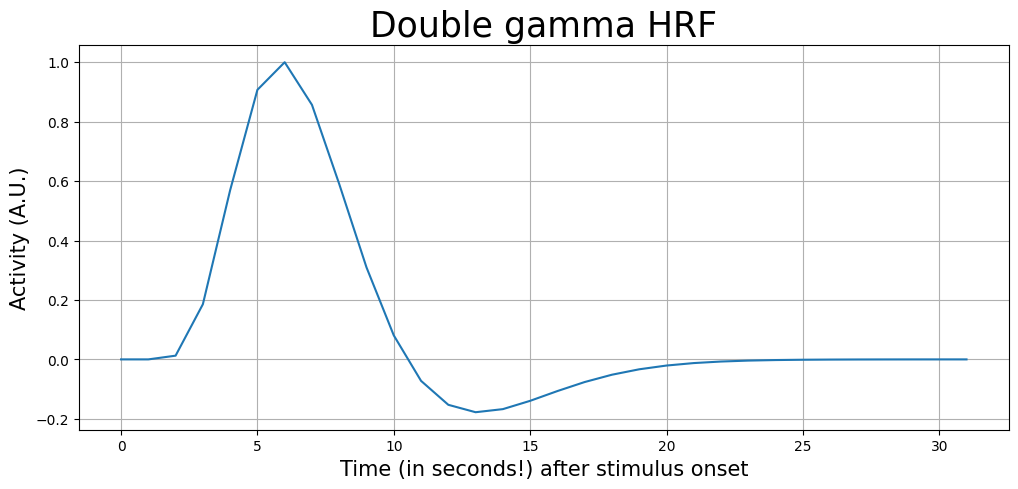

In [96]:
t = np.arange(0, canonical_hrf.size)

plt.figure(figsize=(12, 5))
plt.plot(t, canonical_hrf)
plt.xlabel('Time (in seconds!) after stimulus onset', fontsize=15)
plt.ylabel('Activity (A.U.)', fontsize=15)
plt.title('Double gamma HRF', fontsize=25)
plt.grid()
plt.show()

## 컨볼루션

HRF 그림은 단일 이벤트에 대해 예상되는 이상화된(noise 없는) 응답을 보여준다. 근데 이를 어떻게 우리 모델에 통합해야 하나?
전통적으로 이는 convolution이라는 수학적 연산을 사용하여 수행됨.

기본적으로 0-1로 코딩된 자극 벡터에 걸쳐 HRF를 왼쪽에서 오른쪽으로 슬라이드하고 요소별로 HRF 자극 벡터와 곱함.

$X_{conv} = HRF * X_{original}$

$*$는 컨볼루션의 상징, 

그림을 예로 보자.

3개의 자극 프레젠테이션을 포함하는 길이 100의 시작벡터가 있다고 가정.
t= 10, t=49, t=70.

자극 벡터는 상단 플롯, 이중 감마 HRF 오른쪽 플롯, 자극 벡터와 HRF의 컨볼루션은 하단 플롯

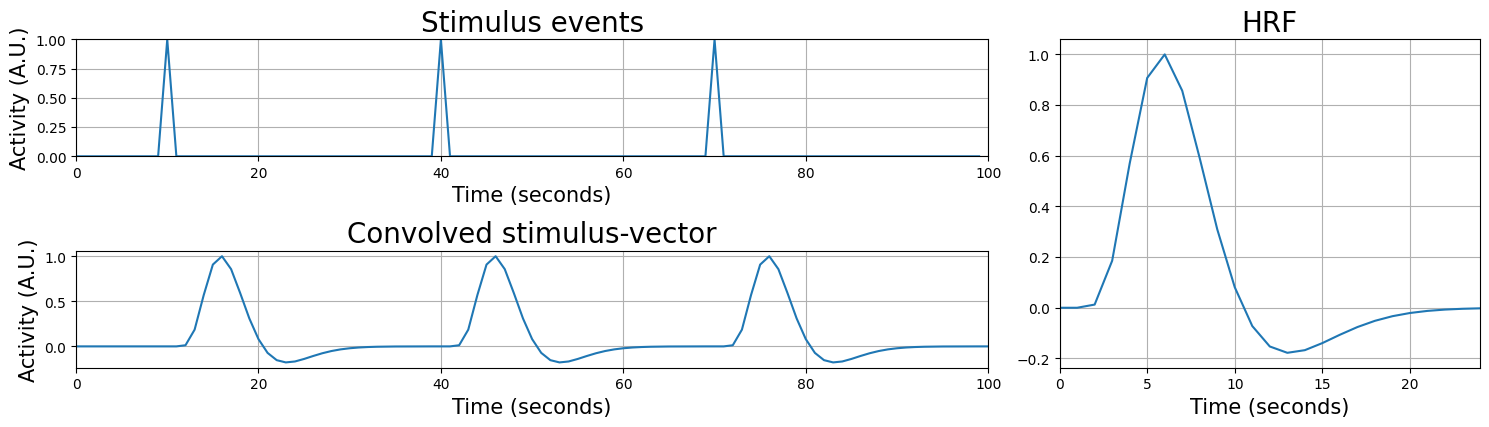

In [97]:
random_stimulus_onsets = [10, 40, 70]
random_stim_vector = np.zeros(100)
random_stim_vector[random_stimulus_onsets] = 1

plt.figure(figsize=(15, 6))
plt.subplot2grid((3, 3), (0, 0), colspan=2)
plt.plot(random_stim_vector)
plt.xlim((0, 100))
plt.ylim((0, 1))
plt.ylabel('Activity (A.U.)', fontsize=15)
plt.xlabel('Time (seconds)', fontsize=15)
plt.title('Stimulus events', fontsize=20)
plt.grid()

plt.subplot2grid((3, 3), (0, 2), rowspan=2)
plt.plot(canonical_hrf)
plt.title('HRF', fontsize=20)
plt.xlim(0, 24)
plt.xlabel("Time (seconds)", fontsize=15)
plt.grid()

convolved_stim_vector = np.convolve(random_stim_vector, canonical_hrf, 'full')
plt.subplot2grid((3, 3), (1, 0), colspan=2)
plt.plot(convolved_stim_vector)
plt.title('Convolved stimulus-vector', fontsize=20)
plt.ylabel('Activity (A.U.)', fontsize=15)
plt.xlabel('Time (seconds)', fontsize=15)
plt.xlim(0, 100)
plt.tight_layout()
plt.grid()
plt.show()

위 시각화 코드에서 처럼 numpy는 두 배열을 컨볼루션 하는 함수를 제공함

**np.convolve(array1, array2)**

한번 우리 데이터로 적용해보자

In [98]:
# 만약 predictor가 (N,1) 형태라면 predictor_all.squeeze()로 (N,)로 바꿀 수 있음.
predictor_conv = np.convolve(predictor_all, canonical_hrf)
print("convolution하고 난 convolved predictor shape:", predictor_conv.shape)

# Trimming(합성 후 값 제거) 합성된 신호에서 초과하는 값 자르기.
predictor_conv = predictor_conv[:predictor_all.size]
print("After triming, the shape is:", predictor_conv.shape)

# 새로운 축 추가. (N, 1로)
predictor_conv = predictor_conv[:, np.newaxis]
print('최종 : ', predictor_conv.shape)

convolution하고 난 convolved predictor shape: (581,)
After triming, the shape is: (550,)
최종 :  (550, 1)


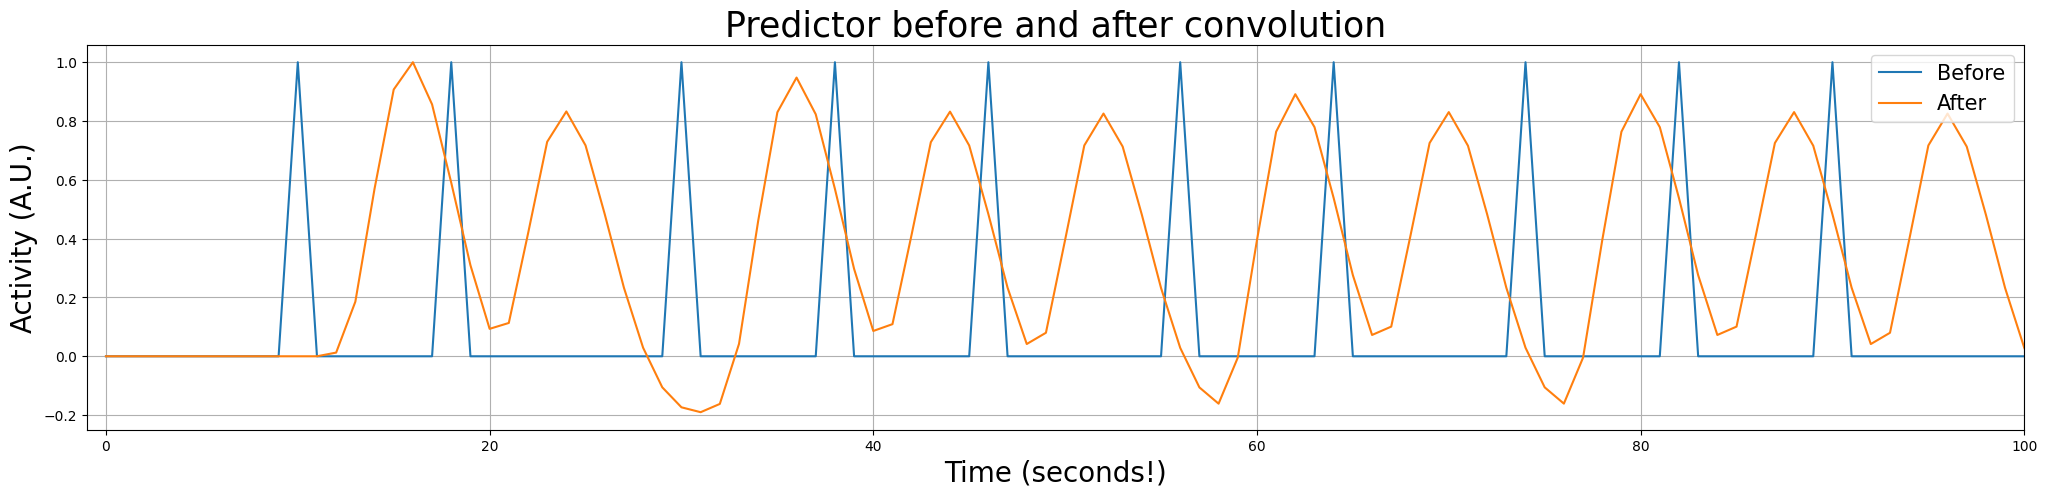

In [99]:
# convolution 적용 전후 차이 보기.
# 100초까지만 우선 보자

plt.figure(figsize=(25, 5))
plt.plot(predictor_all)
plt.plot(predictor_conv)
plt.xlim(-1, 100)
plt.title("Predictor before and after convolution", fontsize=25)
plt.xlabel("Time (seconds!)", fontsize=20)
plt.ylabel("Activity (A.U.)", fontsize=20)
plt.legend(['Before', 'After'], loc='upper right', fontsize=15)
plt.grid()
plt.show()

## 다시 리샘플링

컨볼루션 예측기 통해 신호 분석할 준비 완료. 그러나 문제는 컨볼루션된 예측 변수와 신호의 규모가 서로다름

In [100]:
print("convolved : ", predictor_conv.size)
print("voxel sigmal: ", voxel_signal.size)

convolved :  550
voxel sigmal:  275


리샘플링해서 복셀 신호 볼륨의 시작에 해당하는 컨볼루션된 HRF 예측이의 데이터 포인트를 찾을 수 있다.

중요한 건, 예측 변수를 다운 샘플링하기 전에 single tone 차원을 압축해야한다는 것.
그 다음 이제 플로팅가능

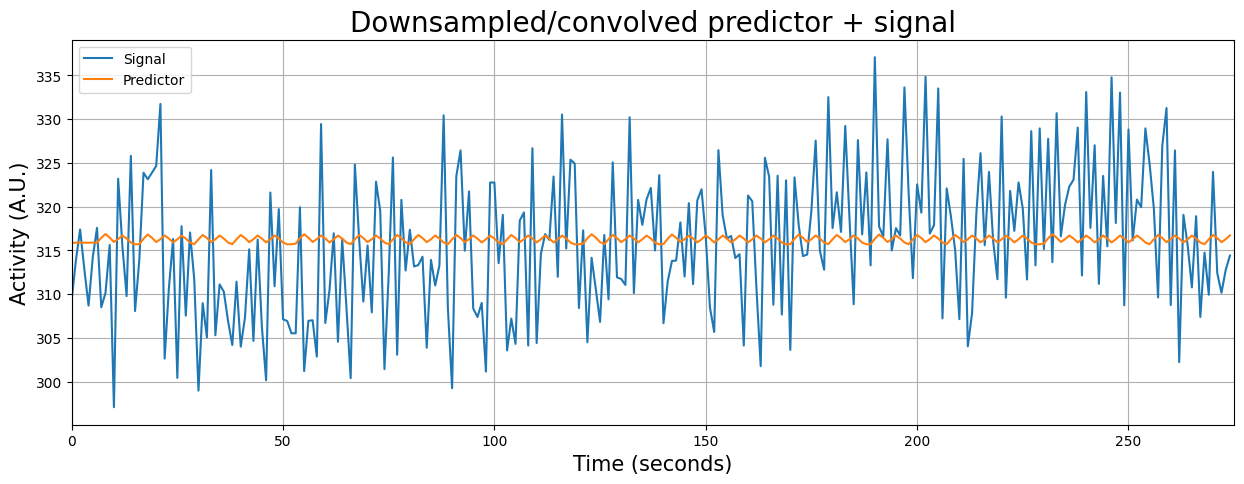

In [103]:
original_scale = np.arange(0, 550)
resampler = interp1d(original_scale, np.squeeze(predictor_conv))

desired_scale = np.arange(0, 550, 2)
predictor_conv_ds = resampler(desired_scale)

plt.figure(figsize=(15, 5))
plt.plot(voxel_signal)
plt.plot(predictor_conv_ds + voxel_signal.mean())
plt.grid()
plt.title('Downsampled/convolved predictor + signal', fontsize=20)
plt.ylabel('Activity (A.U.)', fontsize=15)
plt.xlabel('Time (seconds)', fontsize=15)
plt.legend(['Signal', 'Predictor'])
plt.xlim(x_lim)
plt.show()

## 예측변수의 초기 업샘플링
이전 예에서 리샘플링 프로세스는 다른 모든 데이터 포인트를 선택하는 것이었음.(t=0,t=2,t=4,...) 우리의 시작은 모두 반올림으로 고정되어 있어서... (만약 t=10.25 면?)

근데 우리가 가진 자료 처럼 반올림초로 고정 안된 경우도 있음..

이 때를 위해 100분의 1초와 같은 보다 정확한 시간 단위로 자극 예측 변수 생성하는 것. 즉, 예측 변수를 100배로 오버 샘플링하기.

만약 아래 처럼 50초 동안 지속되는 실험에 밀리초 단위로 기록된 자료가 있다고 가정하고 함 해보자.

In [108]:
onset2 = np.array([3.62, 16.26, 34.12, 42.98])
duration = 50 # 실험 지속 시간
osf = 100 # oversampling factor

pred2 = np.zeros(duration*osf) # 지속시간 x osf = 5000그러니까 0.01,0.02,...50.00까지의 배열 만든 것.
print('oversampled predictor 사이즈 :', pred2.size)

onset2_in_msec = (onset2 * osf).astype(int)
pred2[onset2_in_msec] = 1 # 자극 시간에 1넣어주기

oversampled predictor 사이즈 : 5000


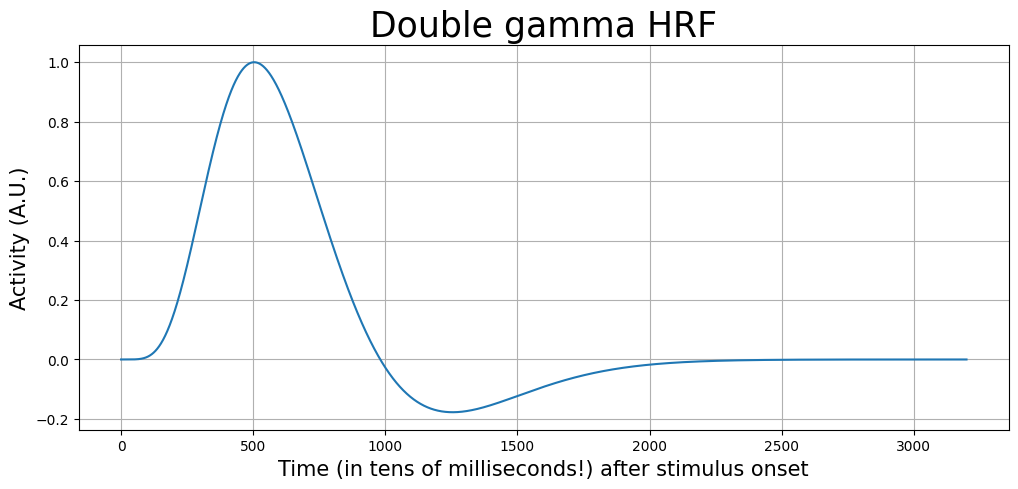

In [109]:
# 이 신호를 콘볼루션 하려면 더 높은 시간적 정밀도(100분의 1초)로 HRF 정의해야함
osf = 100 * TR
hrf_ms = glover_hrf(tr=TR, oversampling=osf, time_length=32)
hrf_ms /= hrf_ms.max()  # scale such that max = 1

t = np.arange(0, hrf_ms.size)

plt.figure(figsize=(12, 5))
plt.plot(t, hrf_ms)
plt.xlabel('Time (in tens of milliseconds!) after stimulus onset', fontsize=15)
plt.ylabel('Activity (A.U.)', fontsize=15)
plt.title('Double gamma HRF', fontsize=25)
plt.grid()
plt.show()

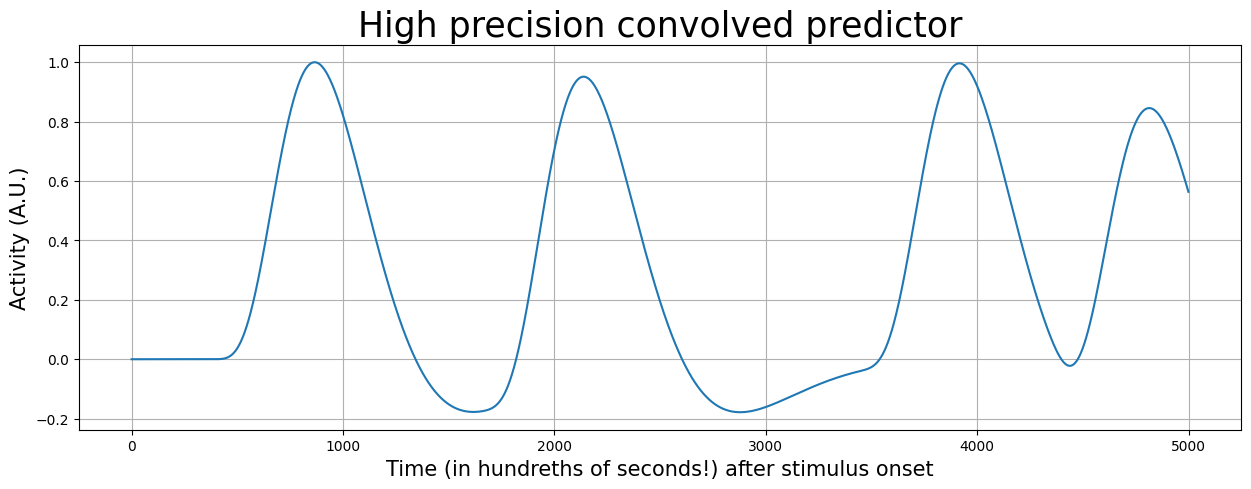

In [110]:
pred2_conv = np.convolve(pred2, hrf_ms)[:pred2.size]

plt.figure(figsize=(15, 5))
plt.plot(pred2_conv)
plt.xlabel('Time (in hundreths of seconds!) after stimulus onset', fontsize=15)
plt.ylabel('Activity (A.U.)', fontsize=15)
plt.title('High precision convolved predictor', fontsize=25)
plt.grid()
plt.show()

## 우리 데이터에 적용해보자.

적용해봅시다!

In [114]:
onset_final_data = pd.read_csv('D:/fmri/0. Raw Data/Behavioral_raw/2207071/RCR_R1_2207071.csv')
onset_final_data

,time,cat,duration,evno,condition,trials.thisRepN,trials.thisTrialN,trials.thisN,trials.thisIndex,stim,...,stim_seq,run_nr,stim_onset,rt,trial_cnt,TimeStamp,subj_id,gender,date,Unnamed: 20
0,10.0,1,4.5,1,task,0,0,0,0,88.jpg,...,1,1,10.044151,1.105750,1,14.509967,2207071,female,2022-07-07_13h09.41.953,NaN
1,14.5,0,3.5,1,NaN,0,1,1,1,NaN,...,1,1,14.516205,NaN,2,18.010550,2207071,female,2022-07-07_13h09.41.953,NaN
2,18.0,1,4.5,1,task,0,2,2,2,15.jpg,...,2,1,18.062219,1.078690,3,22.511603,2207071,female,2022-07-07_13h09.41.953,NaN
3,22.5,0,7.5,1,NaN,0,3,3,3,NaN,...,2,1,22.517053,NaN,4,30.012099,2207071,female,2022-07-07_13h09.41.953,NaN
4,30.0,1,4.5,1,task,0,4,4,4,55.jpg,...,3,1,30.033738,1.550192,5,34.512690,2207071,female,2022-07-07_13h09.41.953,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,528.5,0,5.5,1,NaN,0,115,115,115,NaN,...,58,2,528.581713,NaN,236,534.076715,2207071,female,2022-07-07_13h09.41.953,NaN
236,534.0,1,4.5,1,task,0,116,116,116,25.jpg,...,59,2,534.096868,1.536534,237,538.577113,2207071,female,2022-07-07_13h09.41.953,NaN
237,538.5,0,3.5,1,NaN,0,117,117,117,NaN,...,59,2,538.582500,NaN,238,542.077617,2207071,female,2022-07-07_13h09.41.953,NaN
238,542.0,1,4.5,1,task,0,118,118,118,60.jpg,...,60,2,542.097766,1.371632,239,546.578203,2207071,female,2022-07-07_13h09.41.953,NaN


In [238]:
onset_final = onset_final_data.loc[0:119,['time','cat']]
onset_final = onset_final.loc[onset_final.cat == 1, 'time']
onset_final

0       10.0
2       18.0
4       30.0
6       38.0
8       46.0
10      56.0
12      64.0
14      74.0
16      82.0
18      90.0
20     104.0
22     112.0
24     120.0
26     130.0
28     138.0
30     148.0
32     158.0
34     166.0
36     176.0
38     184.0
40     192.0
42     202.0
44     210.0
46     218.0
48     226.0
50     240.0
52     250.0
54     258.0
56     266.0
58     278.0
60     286.0
62     294.0
64     302.0
66     310.0
68     318.0
70     326.0
72     338.0
74     346.0
76     356.0
78     364.0
80     376.0
82     384.0
84     394.0
86     402.0
88     412.0
90     420.0
92     428.0
94     436.0
96     444.0
98     458.0
100    466.0
102    474.0
104    482.0
106    490.0
108    498.0
110    508.0
112    516.0
114    524.0
116    534.0
118    542.0
Name: time, dtype: float64

In [239]:
onset_final = np.array(onset_final)
duration = 550 # 실험 지속 시간
osf = 10 # oversampling factor

pred_final = np.zeros(duration*osf) # 지속시간 x osf = 5500그러니까 0.1,0.2,...550.0까지의 배열 만든 것.
print('oversampled predictor 사이즈 :', pred_final.size)

onset_final_in_msec = (onset_final * osf).astype(int)
pred_final[onset_final_in_msec] = 1 # 자극 시간에 1넣어주기

oversampled predictor 사이즈 : 5500


In [251]:
# 이중 감마 함수
TR = 2 
osf = 10 * TR
length_hrf = 32 

canonical_hrf = glover_hrf(tr =TR, oversampling=osf, time_length = length_hrf)
canonical_hrf /= canonical_hrf.max() # 생성된 HRF를 최대값으로 나누어 정규화(최대 = 1)
print('canonical hrf variable size : ', canonical_hrf.size)

# convolution
# 만약 predictor가 (N,1) 형태라면 predictor_all.squeeze()로 (N,)로 바꿀 수 있음.
predictor_conv = np.convolve(pred_final, canonical_hrf)
print("convolution하고 난 convolved predictor shape:", predictor_conv.shape)

# Trimming(합성 후 값 제거) 합성된 신호에서 초과하는 값 자르기.
predictor_conv = predictor_conv[:pred_final.size]
print("After triming, the shape is:", predictor_conv.shape)

# 새로운 축 추가. (N, 1로)
predictor_conv = predictor_conv[:, np.newaxis]
print('최종 : ', predictor_conv.shape)

canonical hrf variable size :  320
convolution하고 난 convolved predictor shape: (5819,)
After triming, the shape is: (5500,)
최종 :  (5500, 1)


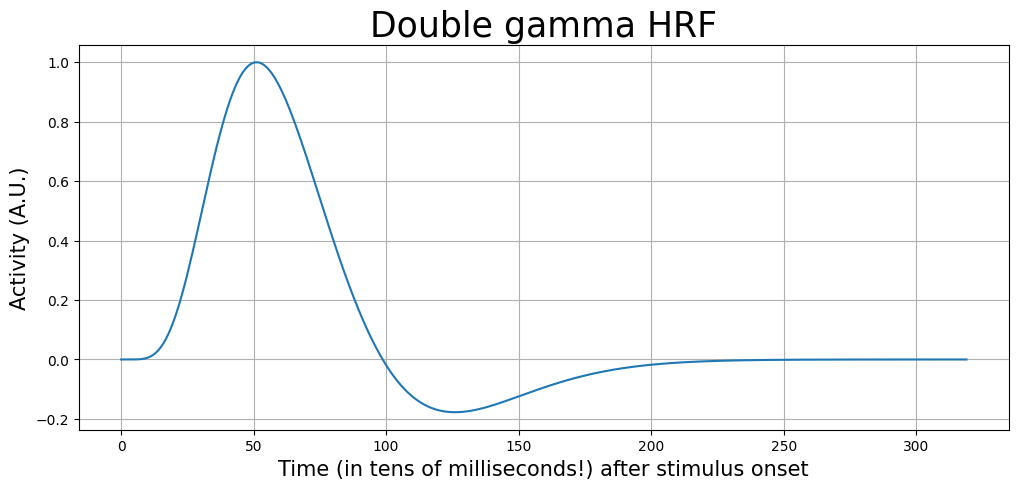

In [252]:
t = np.arange(0, canonical_hrf.size)

plt.figure(figsize=(12, 5))
plt.plot(t, canonical_hrf)
plt.xlabel('Time (in tens of milliseconds!) after stimulus onset', fontsize=15)
plt.ylabel('Activity (A.U.)', fontsize=15)
plt.title('Double gamma HRF', fontsize=25)
plt.grid()
plt.show()

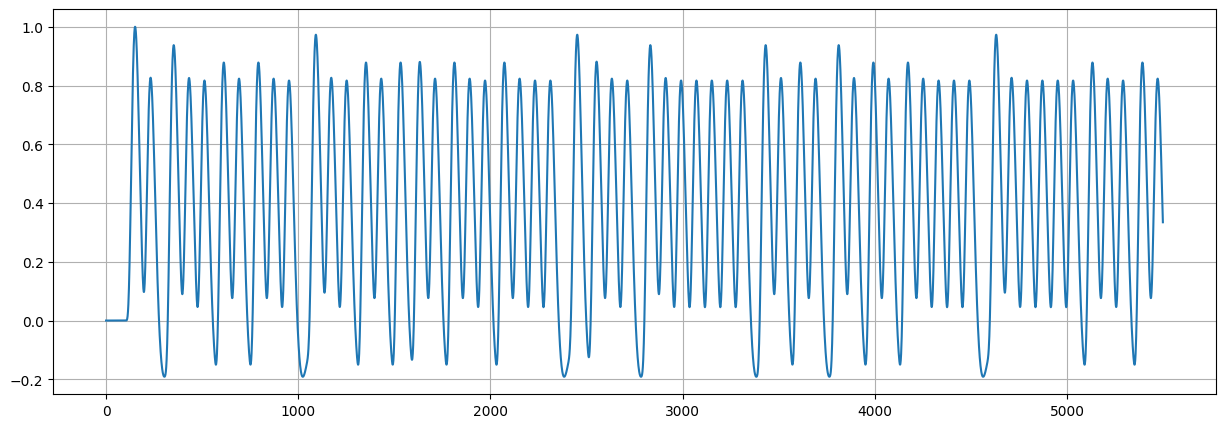

In [253]:
# convolution

pred_final_conv = np.convolve(pred_final, canonical_hrf)[:pred_final.size]
plt.figure(figsize=(15,5))
plt.plot(pred_final_conv)
plt.grid()

In [254]:
# resampling
print("Size convolved predictor: %i" % pred_final_conv.size)
print("Size voxel signal: %i" % voxel_signal.size)

Size convolved predictor: 5500
Size voxel signal: 275


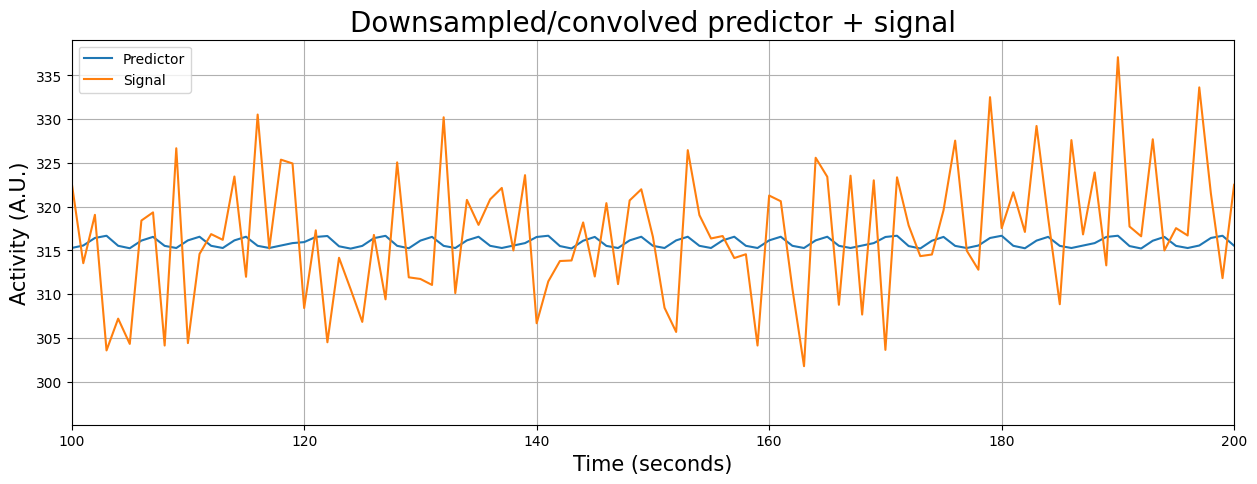

In [272]:
original_scale = np.arange(0, 5500)
resampler = interp1d(original_scale, np.squeeze(pred_final_conv))

desired_scale = np.arange(0, 5500, 20)
pred_final_conv_ds = resampler(desired_scale)

plt.figure(figsize=(15, 5))
plt.plot(pred_final_conv_ds + voxel_signal.mean())
plt.plot(voxel_signal)
plt.grid()
plt.title('Downsampled/convolved predictor + signal', fontsize=20)
plt.ylabel('Activity (A.U.)', fontsize=15)
plt.xlabel('Time (seconds)', fontsize=15)
plt.legend(['Predictor', 'Signal'])
plt.xlim(100,200)
plt.show()

In [256]:
# 선형 모델
pred_final_conv_ds1 = pred_final_conv_ds.reshape(-1, 1)
pred_final_conv_ds1.shape

(275, 1)

In [257]:
from sklearn.linear_model import LinearRegression

regressor1 = LinearRegression()
regressor1.fit(pred_final_conv_ds1, voxel_signal)

LinearRegression()

In [258]:
print('intercept : ', regressor1.intercept_, 'coef : ', regressor1.coef_)

intercept :  315.9241816286891 coef :  [-0.11857681]


In [259]:
n_obs = 275
intercept = np.ones((n_obs, 1))

tuple_with_arrays = (intercept, pred_final_conv_ds1)
X_with_icept = np.hstack(tuple_with_arrays)

y = voxel_signal
# Note: you could also simply do ...
# X_with_icept = np.hstack((np.ones((y.size, 1)), X))
# ... but arguably this is less 'readable' than the implementation above
print("Shape of X is now: %s" % (X_with_icept.shape,))

from numpy.linalg import inv

est_betas = inv(X_with_icept.T @ X_with_icept) @ X_with_icept.T @ y

print("Shape of estimated betas: %s" % (est_betas.shape,))
print(est_betas)

Shape of X is now: (275, 2)
Shape of estimated betas: (2,)
[ 3.15924182e+02 -1.18576811e-01]


In [260]:
# MSE2
y_pred_final = regressor1.predict(pred_final_conv_ds1)

from sklearn.metrics import mean_squared_error
mean_squared_error(voxel_signal, y_pred_final)

66.92020943862524

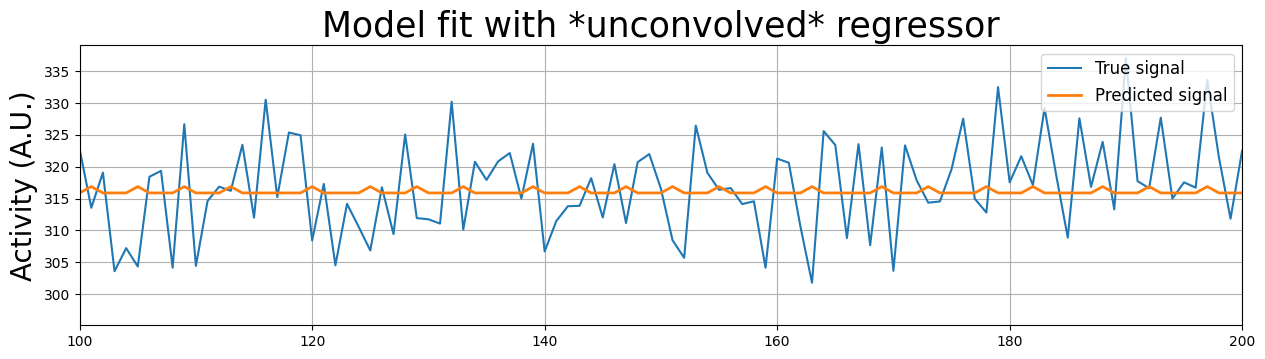

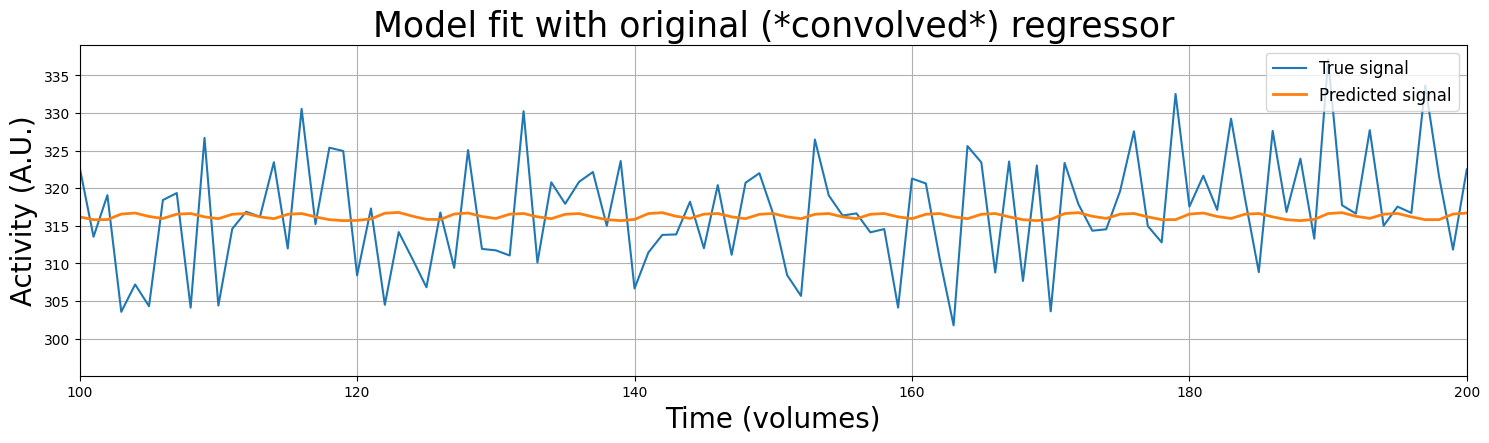

In [261]:
plt.figure(figsize=(15, 8))

plt.subplot(2, 1, 1)
plt.plot(voxel_signal)
plt.plot(predictor_all_ds + voxel_signal.mean(), lw=2)
plt.xlim(100,200)
plt.ylabel("Activity (A.U.)", fontsize=20)
plt.title("Model fit with *unconvolved* regressor", fontsize=25)
plt.legend(['True signal', 'Predicted signal'], fontsize=12, loc='upper right')
plt.grid()
plt.show()

plt.figure(figsize=(15, 8))
plt.subplot(2, 1, 2)
plt.plot(voxel_signal)
plt.plot(pred_final_conv_ds + voxel_signal.mean(), lw=2)
plt.xlim(100,200)
plt.ylabel("Activity (A.U.)", fontsize=20)
plt.title("Model fit with original (*convolved*) regressor", fontsize=25)
plt.legend(['True signal', 'Predicted signal'], fontsize=12, loc='upper right')
plt.xlabel("Time (volumes)", fontsize=20)
plt.grid()

plt.tight_layout()
plt.show()

# 시간 기반 함수

대부분 연구에서는 정규 HRF를 이용한다. 근데 통계를 하는 사람을 알겠지만, 이는 정말로 엄격한 가정에 근거하는 것..
실제 연구에 따르면 HRF의 정확한 모양은 복셀, 조건, 대상에 따라 다르다.

이를 위해 시간 기반 함수를 이용하여 모델링 해보자.

실제 메커니즘은 여러 HRF로 복잡하게 만드는 것과 같다.

자극 조건이 하나만 있다고 가저할 때, y는 원래 HRF와 컨볼루션된 예측변수($X_{orig}$), 및 HRF의 시간적 도함수와 컨볼루션된 예측변수($X_{temp}$)

$y = \beta_0 + X_{orig}\beta_1 + X_{temp}\beta_2 + e$

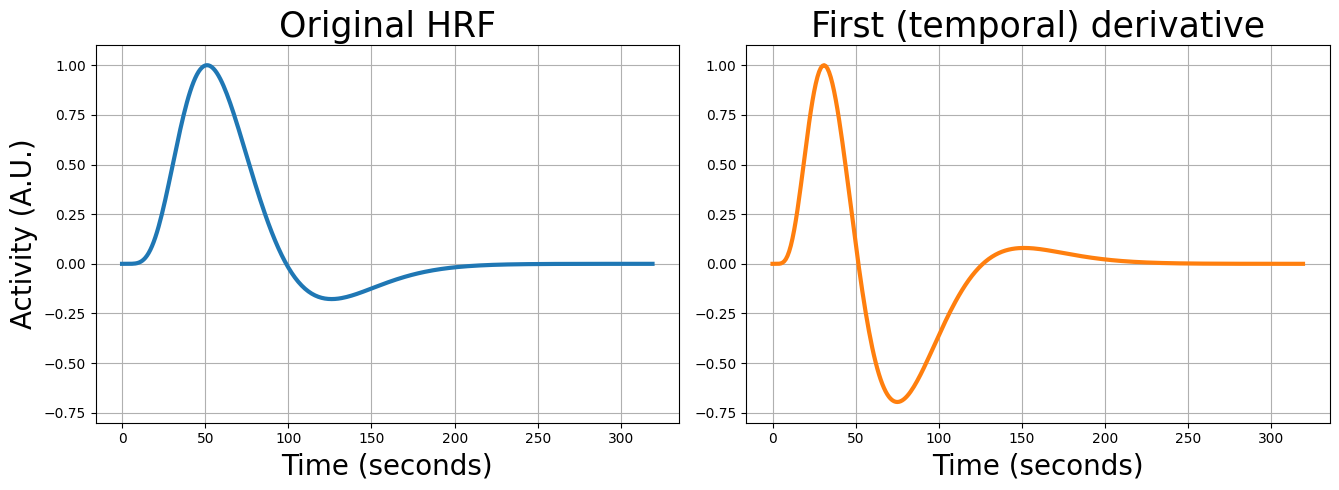

In [263]:
from nilearn.glm.first_level.hemodynamic_models import glover_time_derivative

tderiv_hrf = glover_time_derivative(tr=2, oversampling=20) # Glover HRF 모델의 시간 미분 버전 생성.
tderiv_hrf /= tderiv_hrf.max()

plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plt.plot(canonical_hrf, lw=3)
plt.ylim(-0.8, 1.1)
plt.ylabel("Activity (A.U.)", fontsize=20)
plt.xlabel("Time (seconds)", fontsize=20)
plt.title("Original HRF", fontsize=25)
plt.grid()

plt.subplot(1, 3, 2)
plt.plot(tderiv_hrf, c='tab:orange', lw=3)
plt.ylim(-0.8, 1.1)
plt.xlabel("Time (seconds)", fontsize=20)
plt.title("First (temporal) derivative", fontsize=25)

plt.tight_layout()
plt.grid()

plt.show()

oversampled predictor 사이즈 : 5500
time hrf variable size :  320
time convolution predictor shape: (5819,)
After triming, the shape is: (5500,)
최종 :  (5500, 1)


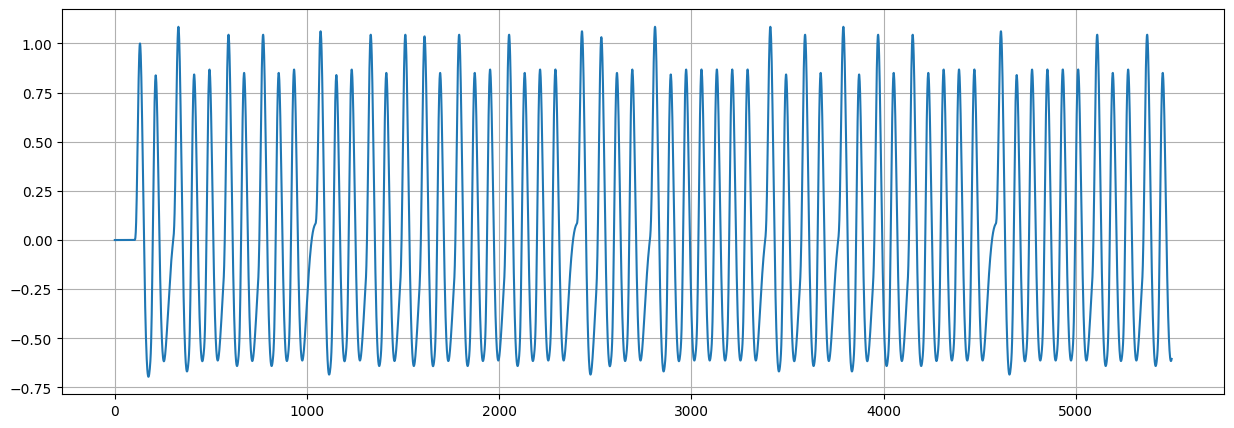

In [266]:
# 시간 미분 버전으로 다시 해보기.

onset_final = np.array(onset_final)
duration = 550 # 실험 지속 시간
osf = 10 # oversampling factor

pred_final = np.zeros(duration*osf) # 지속시간 x osf = 5500그러니까 0.1,0.2,...550.0까지의 배열 만든 것.
print('oversampled predictor 사이즈 :', pred_final.size)

onset_final_in_msec = (onset_final * osf).astype(int)
pred_final[onset_final_in_msec] = 1 # 자극 시간에 1넣어주기

# 이중 감마 함수
TR = 2 
osf = 10 * TR
length_hrf = 32 # 실험의 경우 짧게 짧게 진행되어서 12으로 주어봤음.

tderiv_hrf = glover_time_derivative(tr=2, oversampling=20) # Glover HRF 모델의 시간 미분 버전 생성.
tderiv_hrf /= tderiv_hrf.max()
print('time hrf variable size : ', tderiv_hrf.size)

# convolution
# 만약 predictor가 (N,1) 형태라면 predictor_all.squeeze()로 (N,)로 바꿀 수 있음.
predictor_conv = np.convolve(pred_final, tderiv_hrf)
print("time convolution predictor shape:", predictor_conv.shape)

# Trimming(합성 후 값 제거) 합성된 신호에서 초과하는 값 자르기.
predictor_conv = predictor_conv[:pred_final.size]
print("After triming, the shape is:", predictor_conv.shape)

# 새로운 축 추가. (N, 1로)
predictor_conv = predictor_conv[:, np.newaxis]
print('최종 : ', predictor_conv.shape)

# convolution

pred_final_conv = np.convolve(pred_final, tderiv_hrf)[:pred_final.size]
plt.figure(figsize=(15,5))
plt.plot(pred_final_conv)
plt.grid()

Size convolved predictor: 5500
Size voxel signal: 275


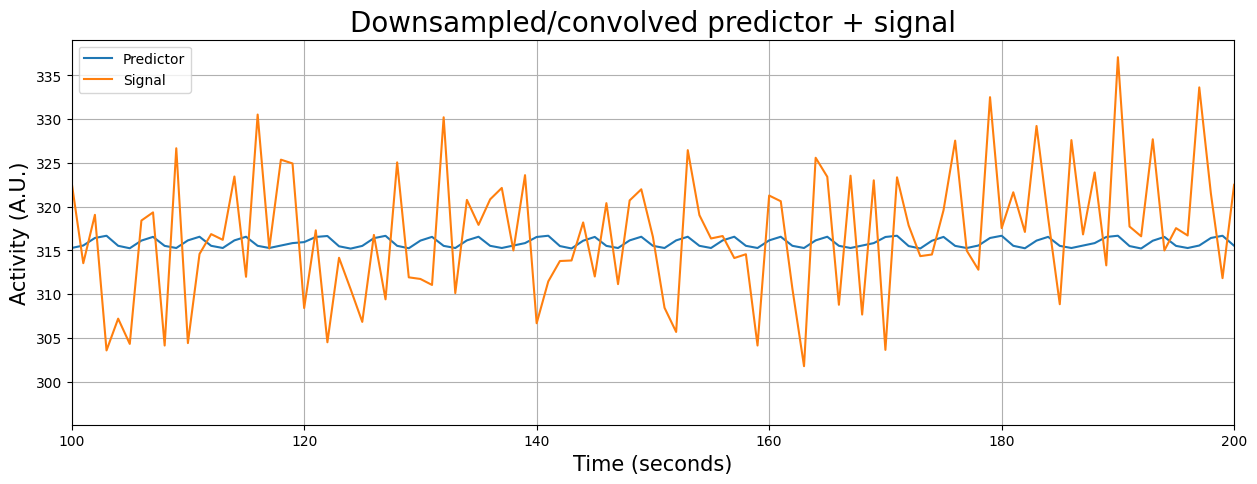

In [273]:
# resampling
print("Size convolved predictor: %i" % pred_final_conv.size)
print("Size voxel signal: %i" % voxel_signal.size)

original_scale = np.arange(0, 5500)
resampler = interp1d(original_scale, np.squeeze(pred_final_conv))

desired_scale = np.arange(0, 5500, 20)
pred_final_conv_ds = resampler(desired_scale)

plt.figure(figsize=(15, 5))
plt.plot(pred_final_conv_ds + voxel_signal.mean())
plt.plot(voxel_signal)
plt.grid()
plt.title('Downsampled/convolved predictor + signal', fontsize=20)
plt.ylabel('Activity (A.U.)', fontsize=15)
plt.xlabel('Time (seconds)', fontsize=15)
plt.legend(['Predictor', 'Signal'])
plt.xlim(100,200)
plt.show()

In [270]:
# 선형 모델
pred_final_conv_ds1 = pred_final_conv_ds.reshape(-1, 1)
pred_final_conv_ds1.shape

from sklearn.linear_model import LinearRegression

regressor2 = LinearRegression()
regressor2.fit(pred_final_conv_ds1, voxel_signal)

print('intercept : ', regressor2.intercept_, 'coef : ', regressor2.coef_)

intercept :  315.87797346389453 coef :  [-0.01395456]


In [271]:
# MSE3
y_pred_final = regressor2.predict(pred_final_conv_ds1)

from sklearn.metrics import mean_squared_error
mean_squared_error(voxel_signal, y_pred_final)

66.92171926018723

# 시각 피질 mask 이용해서 mean signal을 통해 한번 보기.

## 1. 데이터 불러오기 (1번 참가자)


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
import nibabel as nb
import pandas as pd
from nilearn import image as nli
from nilearn import plotting

bold = nb.load('D:/fmri/3. derivatives 폴더에 넣어야 하는 것 (전처리 후 데이터, MNI 템플릿)/fmriprep/sub-ID2207071/func/sub-ID2207071_task-r1_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz')

In [9]:
print(bold.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  4  65  77  65 275   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [1. 3. 3. 3. 2. 1. 1. 1.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 2034.6685
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'xform matrices modified by FixHeaderApplyTransforms (niworkflows v1.6.4).'
aux_file        : b''
qform_code      : mni
sform_code      : mni
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 0.0
qoffset_x       : -96.5
qoffset_y       : -132.5
q

## 2. 유의수준 95%내 voxel 마스크 만들기


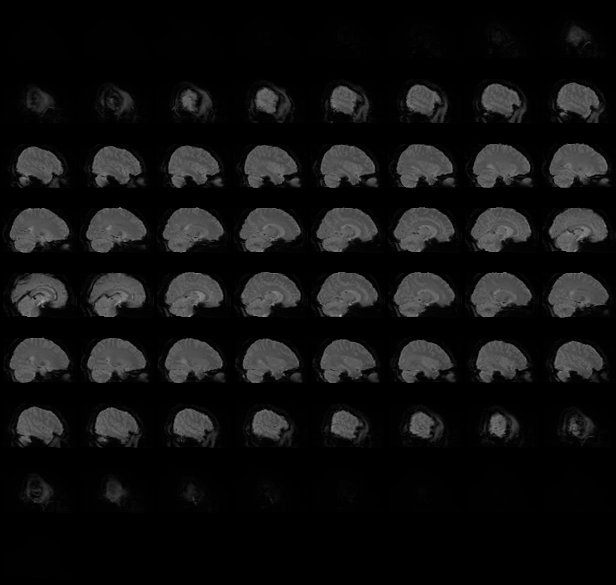
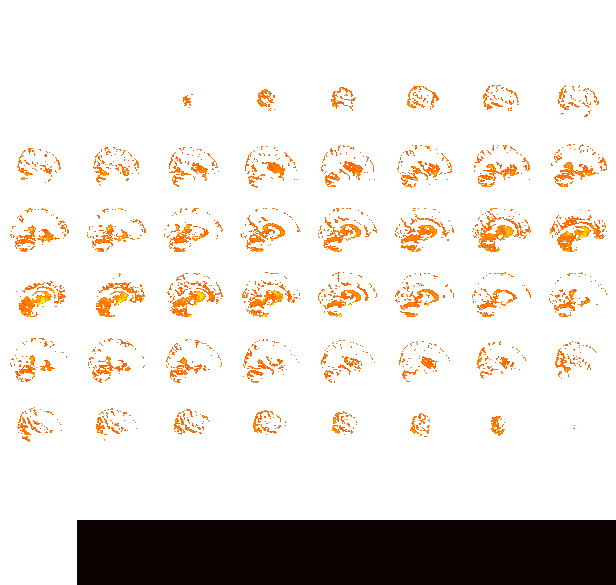

In [16]:
# bg img 불러오기
bg = nb.load('D:/fmri/3. derivatives 폴더에 넣어야 하는 것 (전처리 후 데이터, MNI 템플릿)/fmriprep/sub-ID2207071/func/sub-ID2207071_task-r1_space-MNI152NLin2009cAsym_desc-brain_mask.nii.gz')

# 평균내기(시계열 평균 이미지.)
mean = nli.mean_img(bold)

# 임계값 설정 95%
thr = nli.threshold_img(mean, threshold='95%')

# 임계값 넘는 복셀들..
plotting.view_img(thr, bg_img=mean)

### 2.1 1000mm^3 보다 큰 영역 복셀만 유지

In [18]:
print(thr.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [ 3 65 77 65  1  1  1  1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float64
bitpix          : 64
slice_start     : 0
pixdim          : [1. 3. 3. 3. 1. 1. 1. 1.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 0
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : unknown
sform_code      : aligned
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 0.0
qoffset_x       : -96.5
qoffset_y       : -132.5
qoffset_z       : -78.5
srow_x          : [  3.    0.    0.  -96.5]
srow_y      

In [19]:
voxel_size = np.prod(thr.header['pixdim'][1:4]) # size of 1 voxel in mm^3
voxel_size

27.0

### 2.2 클러스터를 이용한 마스크 생성

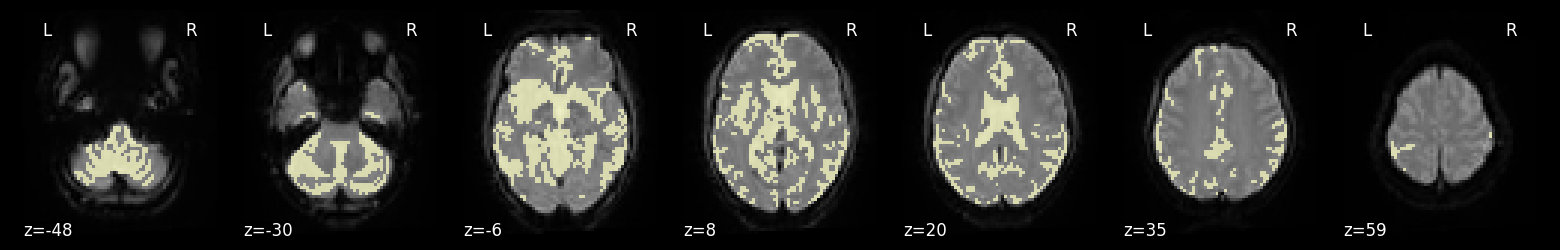

In [21]:
# 클러스터 만들기
from nilearn.regions import connected_regions
cluster = connected_regions(thr, min_region_size=1000./voxel_size, smoothing_fwhm=1)[0]

# 클러스터 파일 이진화해서 마스크 생성
mask = nli.math_img('np.mean(img,axis=3) > 0', img=cluster)

from nilearn.plotting import plot_roi
# 뇌구조이미지(T1)에 그려보면서 확인해보기.
plotting.plot_roi(mask, bg_img = mean, display_mode='z', dim=-.10, cmap='magma_r')

In [22]:
# 데이터에 마스크 적용해보기.
from nilearn.masking import apply_mask

all_timecourses = apply_mask(bold, mask)
print(pd.DataFrame(all_timecourses))

# 결과는 275time series.. 14468개의 복셀에 대한 시계열 데이터.

          0           1           2           3           4           5      \
0    801.852158  802.348911  830.663820  865.995363  816.351130  788.812397   
1    797.567665  798.374888  845.411169  884.499405  818.276047  788.129362   
2    789.712762  789.557526  835.910772  866.274787  815.823330  782.696128   
3    797.257195  787.446327  844.634993  874.595396  807.285392  786.577009   
4    804.925816  798.592218  837.121607  872.887808  818.431283  792.289667   
..          ...         ...         ...         ...         ...         ...   
270  800.548182  800.455041  852.489896  887.479922  835.724489  809.738109   
271  794.245631  789.681714  818.213953  868.385986  829.266703  815.326578   
272  788.750303  797.691853  856.463919  882.574488  826.068857  805.298381   
273  796.387877  799.088971  845.411169  882.667629  837.990924  803.559746   
274  791.699773  806.043510  832.029891  868.789598  825.758386  810.700567   

          6           7           8           9    

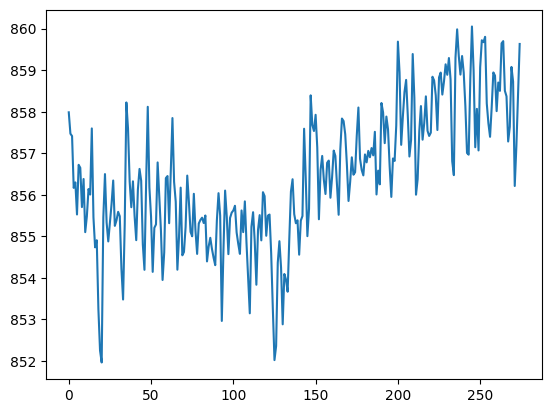

In [23]:
# 추출된 시계열 데이터 평균 신호 계산.
mean_timecourse = all_timecourses.mean(axis=1)
plt.plot(mean_timecourse)

# 3. 독립변수 정의

In [25]:
onset_final_data = pd.read_csv('D:/fmri/0. Raw Data/Behavioral_raw/2207071/RCR_R1_2207071.csv')
onset_final = onset_final_data.loc[0:119,['time','cat']]
onset_final = onset_final.loc[onset_final.cat == 1, 'time']

In [27]:
onset_final.head()

# 끝이 .0이라 오버샘플링 굳이 필요 없을 듯.

0    10.0
2    18.0
4    30.0
6    38.0
8    46.0
Name: time, dtype: float64

In [86]:
onset_final = onset_final.astype(int)

predictor_all = np.zeros(550)
predictor_all[onset_final] = 1

print(predictor_all.T)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.

## 3.1 독립변수 downsampling

In [90]:
# resampler = interp1d(original_scale, original_array, kind='linear')
# downsampled_array = resampler(desired_scale)

from scipy.interpolate import interp1d

original_scale = np.arange(0, 550, 1) # 0~550 초
print("원래 scale : ", original_scale.size)
resampler = interp1d(original_scale, predictor_all)

desired_scale = np.arange(0, 550, 2)
print('Desired scale has %i datapoints(0, 2, 4, ... 550, in volumes)'%desired_scale.size)
predictor_all_ds = resampler(desired_scale)

print("Downsampled predictor has %i datapoints (in volumes)" % predictor_all_ds.size)

원래 scale :  550
Desired scale has 275 datapoints(0, 2, 4, ... 550, in volumes)
Downsampled predictor has 275 datapoints (in volumes)


In [91]:
print(predictor_all_ds)

[0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.
 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.
 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0.
 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0.
 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0.
 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.]


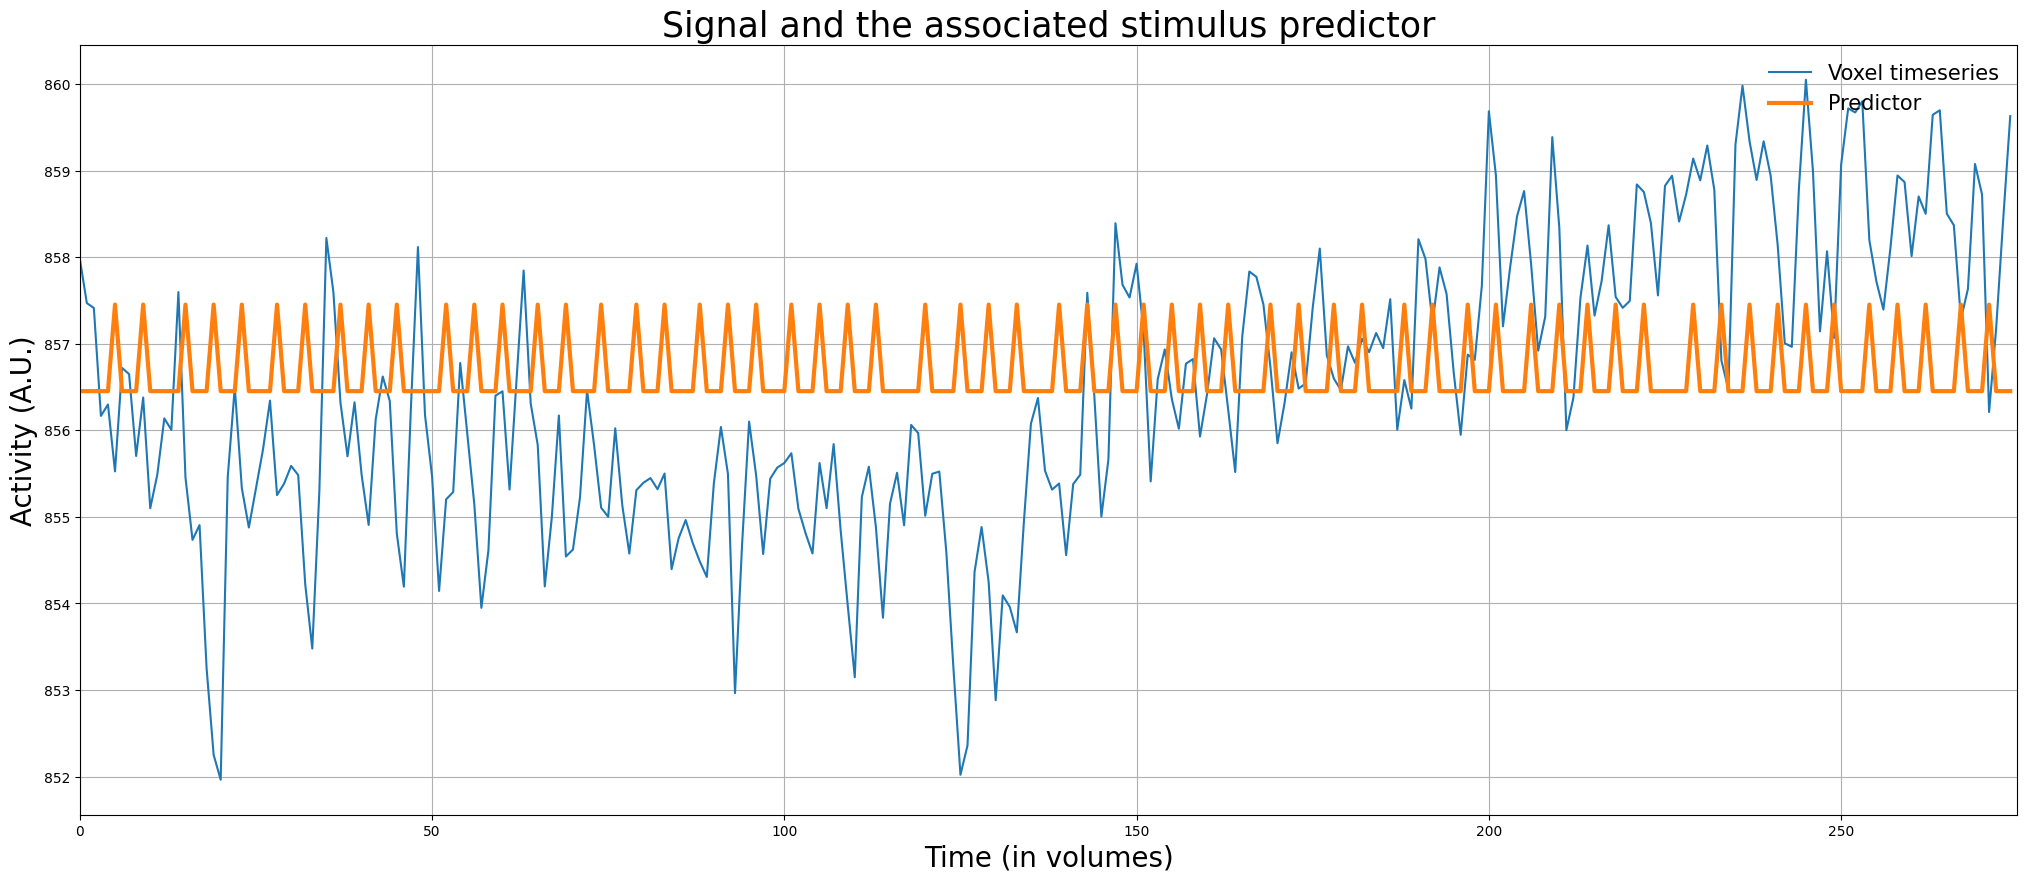

In [94]:
plt.figure(figsize=(25, 10))
plt.plot(mean_timecourse)
plt.plot(predictor_all_ds + mean_timecourse.mean(), lw=3)
plt.xlim(0,275)
plt.ylim(y_lim)
plt.xlabel('Time (in volumes)', fontsize=20)
plt.ylabel('Activity (A.U.)', fontsize=20)
plt.legend(['Voxel timeseries', 'Predictor'], fontsize=15, loc='upper right', frameon=False)
plt.title("Signal and the associated stimulus predictor", fontsize=25)
plt.grid()
plt.show()

# 4. 시간 미분 HRF

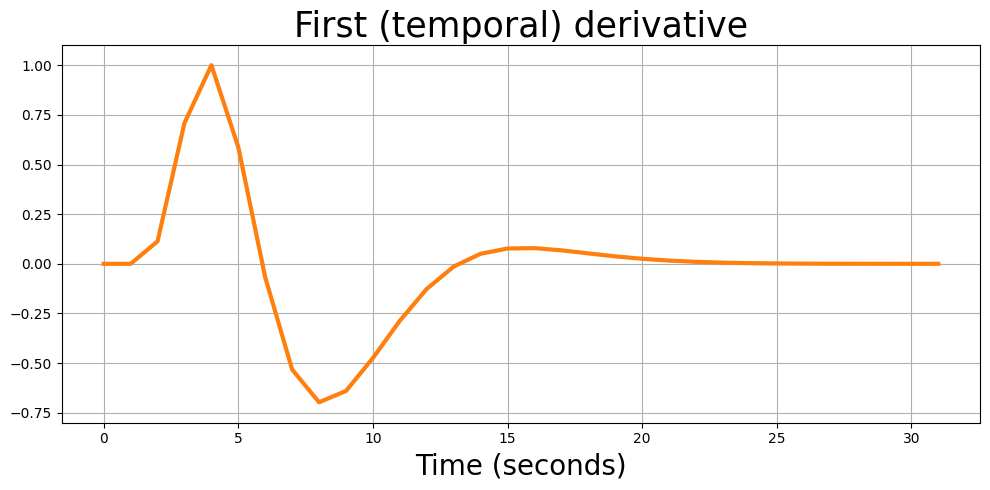

In [98]:
from nilearn.glm.first_level.hemodynamic_models import glover_time_derivative

tderiv_hrf = glover_time_derivative(tr=2, oversampling=2) # Glover HRF 모델의 시간 미분 버전 생성.
tderiv_hrf /= tderiv_hrf.max()

plt.figure(figsize=(10, 5))
plt.plot(tderiv_hrf, c='tab:orange', lw=3)
plt.ylim(-0.8, 1.1)
plt.xlabel("Time (seconds)", fontsize=20)
plt.title("First (temporal) derivative", fontsize=25)

plt.tight_layout()
plt.grid()

plt.show()

## 4.1 convolution

time convolution predictor shape: (306,)
After triming, the shape is: (275,)
최종 :  (275, 1)


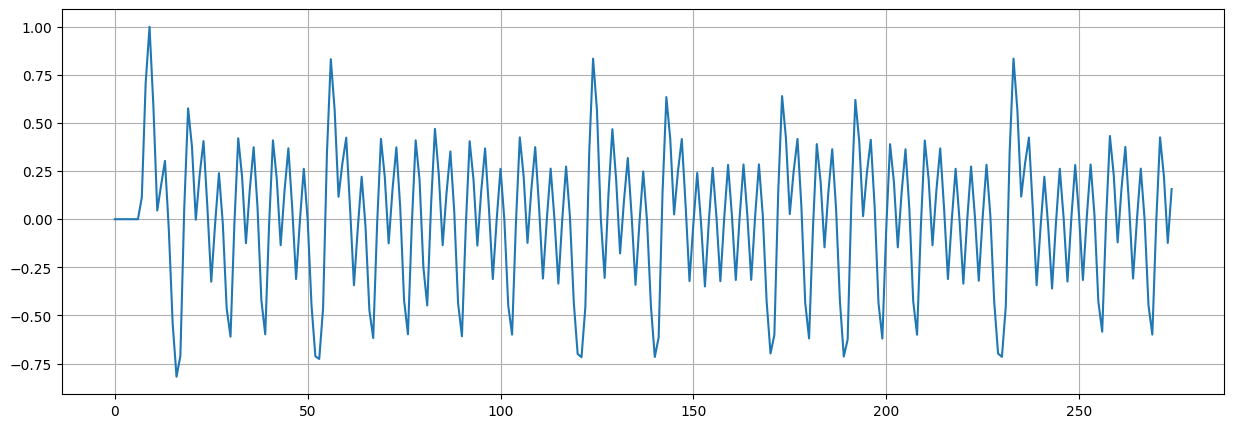

In [100]:
# convolution
# 만약 predictor가 (N,1) 형태라면 predictor_all.squeeze()로 (N,)로 바꿀 수 있음.
predictor_conv = np.convolve(predictor_all_ds, tderiv_hrf)
print("time convolution predictor shape:", predictor_conv.shape)

# Trimming(합성 후 값 제거) 합성된 신호에서 초과하는 값 자르기.
predictor_conv = predictor_conv[:predictor_all_ds.size]
print("After triming, the shape is:", predictor_conv.shape)

# 새로운 축 추가. (N, 1로)
predictor_conv = predictor_conv[:, np.newaxis]
print('최종 : ', predictor_conv.shape)

# convolution

pred_final_conv = np.convolve(predictor_all_ds, tderiv_hrf)[:predictor_all_ds.size]
plt.figure(figsize=(15,5))
plt.plot(pred_final_conv)
plt.grid()

In [101]:
print("Size convolved predictor: %i" % pred_final_conv.size)
print("Size voxel signal: %i" % mean_timecourse.size)

Size convolved predictor: 275
Size voxel signal: 275


# 5. 선형회귀


In [103]:
# 선형 모델
X = pred_final_conv.reshape(-1, 1)
X.shape

y = mean_timecourse

from sklearn.linear_model import LinearRegression

regressor_f = LinearRegression()
regressor_f.fit(X, y)

print('intercept : ', regressor_f.intercept_, 'coef : ', regressor_f.coef_)

intercept :  856.4547641173056 coef :  [-0.18688523]


In [116]:
regressor_f.predict(X)

array([856.45476412, 856.45476412, 856.45476412, 856.45476412,
       856.45476412, 856.45476412, 856.45476412, 856.43360956,
       856.32231379, 856.26787889, 856.34504129, 856.44634783,
       856.42180404, 856.39814547, 856.46465163, 856.55615913,
       856.6078011 , 856.58747526, 856.44450287, 856.34707886,
       856.38418149, 856.4551953 , 856.4116836 , 856.3788694 ,
       856.44321812, 856.51551973, 856.45961821, 856.41006162,
       856.45909949, 856.54133601, 856.56885375, 856.45937248,
       856.37616318, 856.41373598, 856.47808125, 856.42571317,
       856.38488331, 856.44345905, 856.5335948 , 856.56651508,
       856.46008741, 856.37819332, 856.41600867, 856.48006885,
       856.42723833, 856.38595621, 856.44416332, 856.51288508,
       856.45548612, 856.40580688, 856.45543906, 856.53851864,
       856.58800131, 856.59047843, 856.54103748, 856.39048886,
       856.29930612, 856.34877576, 856.43298887, 856.40055596,
       856.37555522, 856.44450671, 856.51890566, 856.46

(0.0, 275.0)

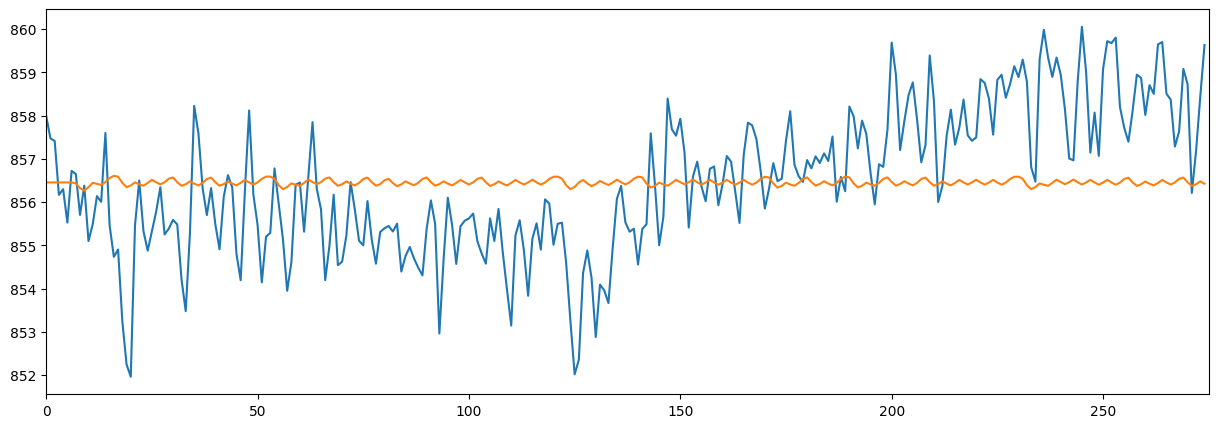

In [120]:
# 시각화
plt.figure(figsize=(15,5))
plt.plot(mean_timecourse)
plt.plot(regressor_f.predict(X))
plt.xlim(0,275)